In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

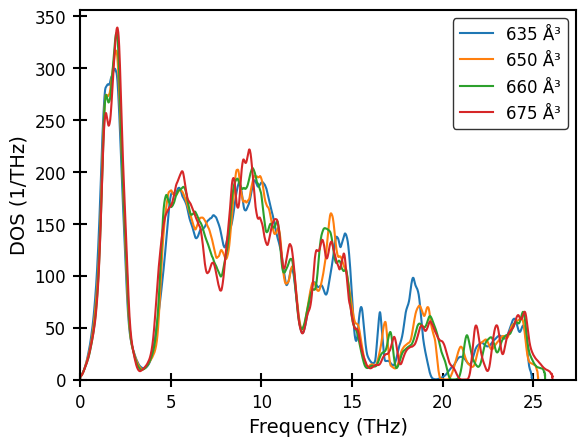

In [11]:
# Plot and compare phonon DOS

# Read in data
vdos_1 = np.loadtxt('90DW/with_dipole/scaled_phonon_dos/vdos_1.00')
vdos_2 = np.loadtxt('90DW/with_dipole/scaled_phonon_dos/vdos_2.00')
vdos_3 = np.loadtxt('90DW/with_dipole/scaled_phonon_dos/vdos_3.00')
vdos_4 = np.loadtxt('90DW/with_dipole/scaled_phonon_dos/vdos_4.00')

# Plot data
plt.plot(vdos_1[:,0] * 1e-12, vdos_1[:,1] / 1e-12 * 150, label='635' + ' Å³')
plt.plot(vdos_2[:,0] * 1e-12, vdos_2[:,1] / 1e-12 * 150, label='650' + ' Å³')
plt.plot(vdos_3[:,0] * 1e-12, vdos_3[:,1] / 1e-12 * 150, label='660' + ' Å³')
plt.plot(vdos_4[:,0] * 1e-12, vdos_4[:,1] / 1e-12 * 150, label='675' + ' Å³')
plt.xlabel('Frequency (THz)', fontsize=14)
plt.ylabel('DOS (1/THz)', fontsize=14)
plt.legend(edgecolor='black', fontsize=12)
plt.xlim(0)
plt.ylim(0)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5)
ax.spines['top'].set_linewidth(1.5)  # Top border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border
ax.spines['left'].set_linewidth(1.5)  # Left border
ax.spines['right'].set_linewidth(1.5)  # Right border

# Customize the tick marks to be cross-shaped
ax.get_xaxis().set_tick_params(which='both', direction='inout', length=10, width=1.5, color='black', pad=5)
ax.get_yaxis().set_tick_params(which='both', direction='inout', length=10, width=1.5, color='black', pad=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save a high resolution image with tight layout
plt.savefig('FEG_phonon_dos', dpi=300, bbox_inches='tight')

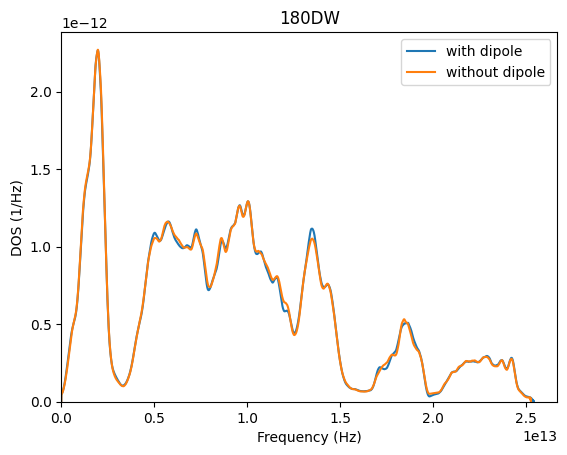

In [118]:
# Plot and compare the phonon DOS with and without the dipole correction

# Read in data
with_dipole = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_3.00')
without_dipole = np.loadtxt('180DW/without_dipole/scaled_phonon_dos/vdos_3.00')

# Plot the data
plt.plot(with_dipole[:,0], with_dipole[:,1], label='with dipole')
plt.plot(without_dipole[:,0], without_dipole[:,1], label='without dipole')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.xlim(0)
plt.ylim(0)        
plt.title('180DW')

# Save a high resolution image
plt.savefig('180DW_phonon_dos_with_and_without_dipole.png', dpi=300)

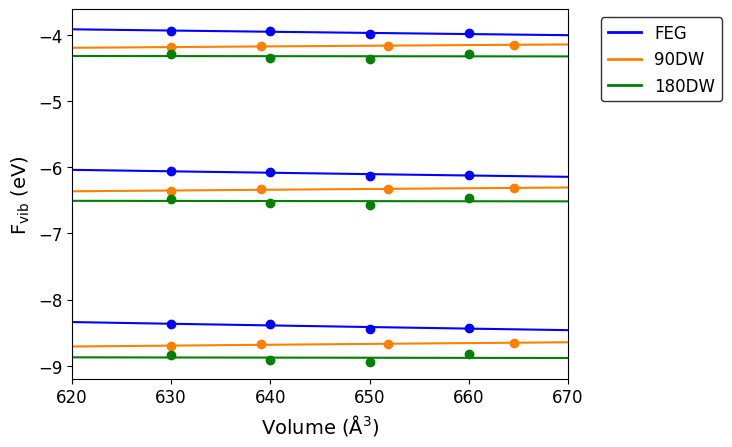

In [27]:
# Plot Fvib vs. volume for fixed T

# Read in data
out1_fvib = np.loadtxt('out1_fvib')
out1_fvib_fit = np.loadtxt('out1_fvib_fit')
out1_volume_structures = np.loadtxt('out1_volume_structures')
out1_volume_structures_fit = np.loadtxt('out1_volume_structures_fit')
out2_fvib = np.loadtxt('out2_fvib')
out2_fvib_fit = np.loadtxt('out2_fvib_fit')
out2_volume_structures = np.loadtxt('out2_volume_structures')
out2_volume_structures_fit = np.loadtxt('out2_volume_structures_fit')
out3_fvib = np.loadtxt('out3_fvib')
out3_fvib_fit = np.loadtxt('out3_fvib_fit')
out3_volume_structures = np.loadtxt('out3_volume_structures')
out3_volume_structures_fit = np.loadtxt('out3_volume_structures_fit')

T = [59, 69, 79]
plt.plot(out1_volume_structures[:, T]*50, out1_fvib[:, T]*50, 'bo')
plt.plot(out1_volume_structures_fit[:, T]*50, out1_fvib_fit[:, T]*50, 'b')

plt.plot(out2_volume_structures[:, T]*50, out2_fvib[:, T]*50, 'o', color=(1, 0.5, 0))
plt.plot(out2_volume_structures_fit[:, T]*50, out2_fvib_fit[:, T]*50, '-', color=(1, 0.5, 0))

plt.plot(out3_volume_structures[:, T]*50, out3_fvib[:, T]*50, 'go')
plt.plot(out3_volume_structures_fit[:, T]*50, out3_fvib_fit[:, T]*50, 'g')

plt.xlabel(r'Volume (Å$^3$)', fontsize=14)
plt.ylabel(r'$\mathrm{F_{vib}}$ (eV)', fontsize=14)
plt.xlim(620, 670)
# Change the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.lines import Line2D

# Your existing plot code
# ...

# Create custom legend handles
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color=(1, 0.5, 0), lw=2),
                Line2D([0], [0], color='green', lw=2)]

# Add the legend with your custom labels
plt.legend(custom_lines, ['FEG', '90DW', '180DW'], fontsize=12, edgecolor='black', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text labels
#plt.text(634, -5.5, 'FEG', color='blue', fontsize=12)
#plt.text(644, -5.5, '90DW', color=(1, 0.5, 0), fontsize=12)
#plt.text(657, -5.5, '180DW', color='green', fontsize=12)

# Save a high resolution image
plt.savefig('Fvib_vs_volume.png', dpi=300, bbox_inches='tight')
plt.show()

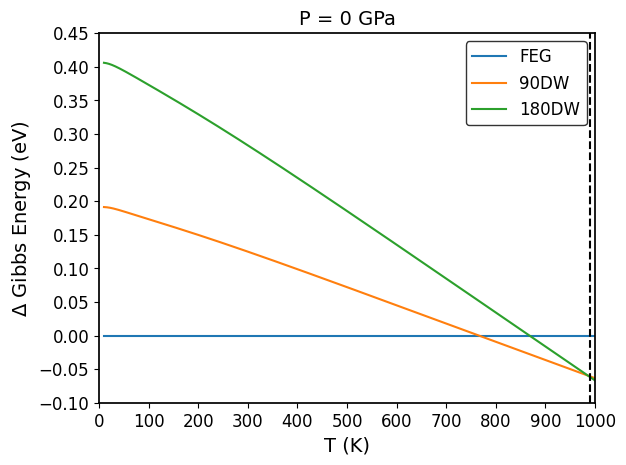

In [19]:
# Plot delta Gibbs energy for P = 0 
FEG = np.loadtxt('property_eachev_FEG')
ninety = np.loadtxt('property_eachev_90DW')
eighty = np.loadtxt('property_eachev_180DW')

#Make a numpy array with FEG[:,10] in the first column, ninety[:,10] in the second column, and eighty[:,10] in the third column
Gibbs = np.column_stack((FEG[:,10]-FEG[:,10], ninety[:,10]-FEG[:,10], eighty[:,10]-FEG[:,10]))
temp = FEG[:,0]
plt.plot(temp, Gibbs[:,0], label='FEG')
plt.plot(temp, Gibbs[:,1], label='90DW')
plt.plot(temp, Gibbs[:,2], label='180DW')
plt.legend(edgecolor='black', fontsize=12)
plt.xlabel('T (K)', fontsize=14)
plt.ylabel(r'$\Delta$ Gibbs Energy (eV)', fontsize=14)
# Make the border thicker
ax = plt.gca()
ax.spines['top'].set_linewidth(1.25)  # Top border
ax.spines['bottom'].set_linewidth(1.25)  # Bottom border
ax.spines['left'].set_linewidth(1.25)  # Left border
ax.spines['right'].set_linewidth(1.25)  # Right border

ticks = np.arange(0, 1100, 100)
plt.xticks(ticks, fontsize=12)
plt.xlim(left=0)
plt.xlim(right=1000)
ticks = np.arange(-0.1,0.5,0.05)
plt.yticks(ticks, fontsize=12)
plt.title('P = 0 GPa', fontsize=14)
# Save a high resolution image
plt.savefig('delta_G_vs_T.png', dpi=300, bbox_inches='tight')
# Plot a vertical line
plt.axvline(x=990, color='black', linestyle='--')

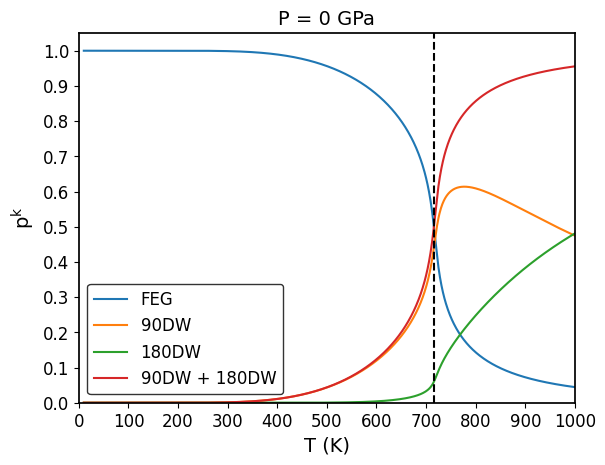

In [21]:
# Plot zentropy properties
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]

zentropy_properties = np.loadtxt('property_PF_1K')

# Plot the results
plt.plot(zentropy_properties[:,0], zentropy_properties[:,12], label='FEG')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13], label='90DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,14], label='180DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13]+zentropy_properties[:,14], label='90DW + 180DW')
plt.legend(edgecolor='black', fontsize=12)
plt.xlabel('T (K)', fontsize=14)
plt.ylabel(r'$\mathrm{p^{k}}$', fontsize=14)
plt.xlim(0, 1000)
plt.ylim(0)
plt.title('P = 0 GPa', fontsize=14)

xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks, fontsize=12)

ylim = plt.gca().get_ylim()
ticks = np.arange(0, 1.1, 0.1)
plt.yticks(ticks, fontsize=12)

plt.axvline(x=716, color='black', linestyle='--')
ax = plt.gca()
ax.spines['top'].set_linewidth(1.25)  # Top border
ax.spines['bottom'].set_linewidth(1.25)  # Bottom border
ax.spines['left'].set_linewidth(1.25)  # Left border
ax.spines['right'].set_linewidth(1.25)  # Right border

# Save a high resolution image
plt.savefig('probability_vs_T.png', dpi=300, bbox_inches='tight')

660.3421


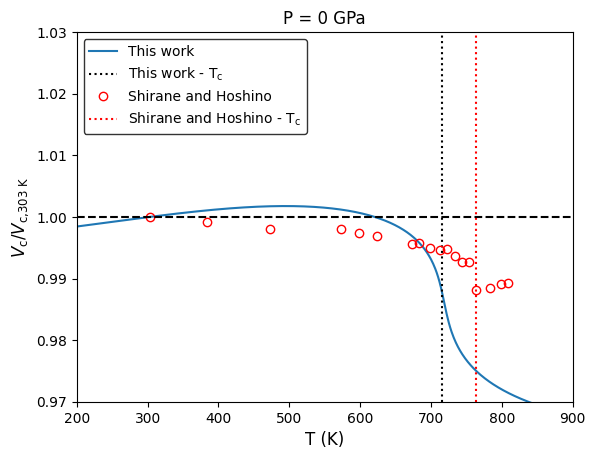

In [29]:
# Plot equilibrium volume vs T
plt.plot(zentropy_properties[:,0], zentropy_properties[:,1]/zentropy_properties[293,1], label = 'This work')
plt.axvline(x=716, color='black', linestyle=':', label = r'This work - $\mathrm{T_{c}}$')

expt_T = np.array([303.15, 383.15, 473.15, 573.15, 598.15, 623.15, 673.15, 683.15, 698.15, 713.15, 723.15, 733.15, 743.15, 753.15, 763.15, 783.15, 798.15, 808.15])
expt_v = np.array([62.77, 62.72, 62.65, 62.65, 62.61, 62.58, 62.49, 62.5, 62.45, 62.43, 62.44, 62.37, 62.31, 62.31, 62.03, 62.05, 62.09, 62.1])
plt.plot(expt_T, expt_v/expt_v[0], 'o', color='red', markerfacecolor='none', label = 'Shirane and Hoshino')
plt.axvline(x=763, color='red', linestyle=':', label = r'Shirane and Hoshino - $\mathrm{T_{c}}$')

plt.xlim(200, 900)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks)
plt.ylim(0.97, 1.03)

plt.xlabel('T (K)', fontsize=12)
#plt.ylabel(r'Unit Cell Volume ($\mathrm{\AA^3}$)', fontsize=12);
plt.ylabel(r'$V_{\text{c}}/V_{\text{c,303 K}}$', fontsize=12)
plt.legend(edgecolor='black')

# Save a high resolution image
plt.savefig('volume_vs_T.png', dpi=300)
print(zentropy_properties[293,1])
#Draw a horizontal line at 1.00
plt.axhline(y=1, color='black', linestyle='--')

0.4541032602069264 745.0


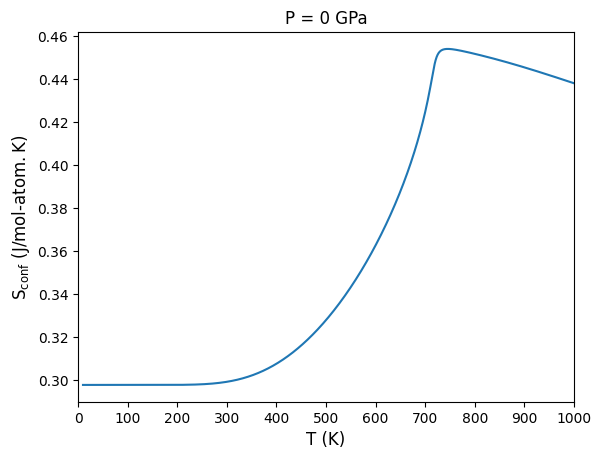

In [24]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot Sconf vs T

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 6]/50 * 1.60218e-19 * 6.02e23)
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
#plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{S_{conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
#plt.text(880, plt.gca().get_ylim()[1]-0.06, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)

# Print the max value of Sconf and the corresponding T
max_Sconf = np.max(zentropy_properties[:, 6]/50 * 1.60218e-19 * 6.02e23)
max_Sconf_T = zentropy_properties[np.argmax(zentropy_properties[:, 6]/50 * 1.60218e-19 * 6.02e23),0]
print(max_Sconf, max_Sconf_T)

# Save a high resolution image
plt.savefig('Sconf_vs_T.png', dpi=300)


0.936383996691612
716.0


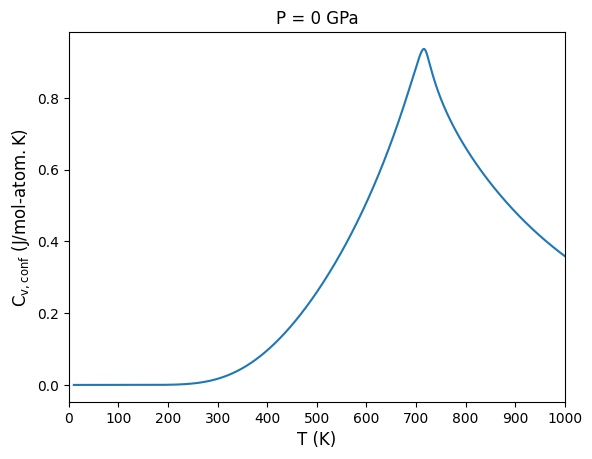

In [25]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot Cv,conf vs T

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 7]/50 * 1.60218e-19 * 6.02e23)
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
#plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{C_{v,conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
#plt.text(880, plt.gca().get_ylim()[1]-0.43, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)

# Print the max value of Cv,conf and its corresponding T
print(np.max(zentropy_properties[:, 7]/50 * 1.60218e-19 * 6.02e23))
Cv_max = zentropy_properties[np.argmax(zentropy_properties[:, 7]/50 * 1.60218e-19 * 6.02e23), 0]
print(Cv_max)

# Save a high resolution image
plt.savefig('Cvconf_vs_T.png', dpi=300)

24.95640623250096
910.0


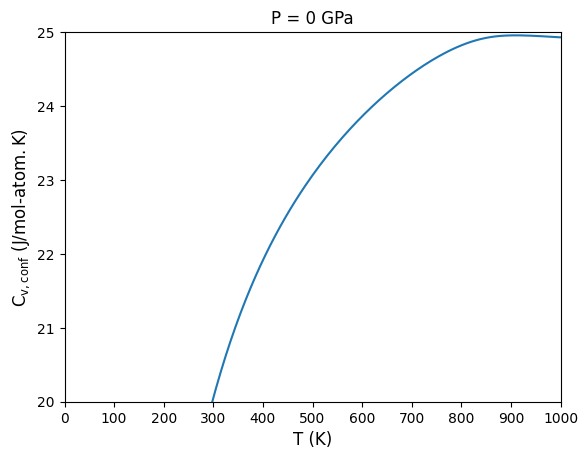

In [19]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 4]/50 * 1.60218e-19 * 6.02e23)
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
#plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{C_{v,conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
#plt.text(880, plt.gca().get_ylim()[1]-0.43, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)

# Print the max value of Cv,conf and its corresponding T
print(np.max(zentropy_properties[:, 4]/50 * 1.60218e-19 * 6.02e23))
Cv_max = zentropy_properties[np.argmax(zentropy_properties[:, 4]/50 * 1.60218e-19 * 6.02e23), 0]
print(Cv_max)
plt.ylim(20, 25)
# Save a high resolution image
plt.savefig('Cv_vs_T.png', dpi=300)

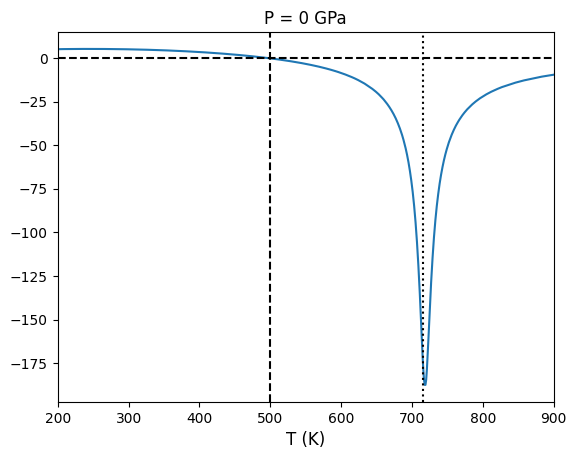

In [33]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot thermal expansion coefficient vs T

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 9])
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.axvline(x=716, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
#plt.ylabel(r'$\mathrm{C_{v,conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
#plt.text(880, plt.gca().get_ylim()[1]-0.43, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)
#Plot the x-range from 200 to 900
plt.xlim(200, 900)
# plot a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')
#plot a vertical line at x=500
plt.axvline(x=500, color='black', linestyle='--')
# Save a high resolution image
#plt.savefig('Cvconf_vs_T.png', dpi=300)